# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy>Deep Autoencoders</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

<div class="alert alert-block alert-info">


Modeling data with many features/variables is challenging, and models built from data that include irrelevant features are often less skillful than models trained from the most relevant data. It is hard to know which features of the data are relevant and which are not. Methods for automatically reducing the number of columns of a dataset are called dimensionality reduction, and perhaps the most popular is method is called the principal component analysis or PCA for short. The core of the PCA method is a matrix factorization (a.k.a Matrix decomposition) method from linear algebra. The eigendecomposition can be used and more robust implementations may use the singular-value decomposition or SVD.


<img src="images/PCA_Plot.gif"  width="550">

> PCA aims to detect the correlation between variables. Convert possible correlated features (predictors) into linearly uncorrelated features (predictors) called principal components. PCA is a method for extracting  latent variables that explain common variance across features.



</div>




## Feature extraction & Dimensionality Reduction with Deep Neural Nets

### Autoencoders

Autoencoders are one of the unsupervised deep learning models. The aim of an autoencoder is dimensionality reduction and feature discovery. An autoencoder is trained to predict its own input, but to prevent the model from learning the identity mapping, some constraints are applied to the hidden units. 

“Autoencoding” is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term “autoencoder” is used, the compression and decompression functions are implemented with neural networks.

For building an autoencoder, three things are needed: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a “loss” function).

The simplest form of an autoencoder is a feedforward neural network where the input $x$ is fed to the hidden layer and the output of hidden layer is then fed to reconstruct the original inputs. A simple autoencoder is shown below:

<center><img src="images/autoencoder.png" width="650" alt="A simple Autoencoder."></center>
<center><img src="images/autoencoder2.png" width="850" alt="A simple Autoencoder."></center>

Autoencoders map the data they are fed to a lower dimensional space by combining the data’s most important features. It encodes the original data into a more compact representation. It also decides how the data is combined, hence the auto in Autoencoder. We refer to these encoded features as latent variables.

There are a few reasons doing this may be useful:

1. Dimensionality reduction can decrease training time.
1. Using latent feature representations may enhance model performance.


Like the Autoencoder model, Principal Components Analysis (PCA) is also widely used as a dimensionality reduction technique. However, PCA maps the input in a different way than an Autoencoder.

Both PCA and Autoencoder can be thought of as a lossy data compression algorithm. The quality of the data is not perfectly retained -- some of the original data get lost. Notice that it is different with feature selection. Feature selection algorithms discard some features of the data and retain salient features. The features they retain are typically chosen for statistical reasons, such as the correlation between the attribute and the target label. Autoencoder, as a feature extraction algorithm, projects data into a new space.

Let's recap how PCA worked first.

### PCA

### Readings:

1. The Elementss of Statistical Learning, (PCA is covered extensively in ***chapters 3.5, 14.5, and 18.6***)

2. ***Chapter 23,*** Understanding Machine Learning From Theory to Algorithms 

3. Jonathon Shlens, [A Tutorial on Principal Component Analysis](https://arxiv.org/pdf/1404.1100.pdf)

4. Jianqing Fan, Qiang Sun, Wen-Xin Zhou, and Ziwei Zhu, [Principal component analysis for big data](https://arxiv.org/abs/1801.01602)

### Goals

- In real world data analysis tasks we analyze complex data i.e. high-dimensional data. Today is all about Dimension Reduction.

- Dimension reduction (DR) is the task of transforming our data set to one with less features.

- We have a high-dimensional matrix of data X. We’d like to reduce this to a few ‘important’ factors.

- We want to capture the main structure in the data with fewer and more informative features.

- Principal Components Analysis (PCA) is a model-free linear dimension reduction method.

- PCA finds a low-dimensional representation of data that captures as much information as possible.

- PCA, first introduced by Karl Pearson (Pearson,1901), is one of the most commonly used techniques for dimension reduction in many disciplines.

<img src="images/bigp.png"  width="700">

> Feature extraction involves the production of a new set of features from the original features in the data.


### What is principal component analysis?

- A simple way to reduce the dimensionality of the space of variables is to apply some techniques of Matrix Factorization. The mathematical methods of Factorization of Matrices have many applications in a variety of problems related to big data analytics, since the reduction of dimensionality is the essence of cognition.

- PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

- Method:
    - Eigenvalue decomposition of a data covariance (or correlation) matrix
    - Singular value decomposition of a data matrix (After mean centering / normalizing ) the data matrix for each attribute.




### Showcase

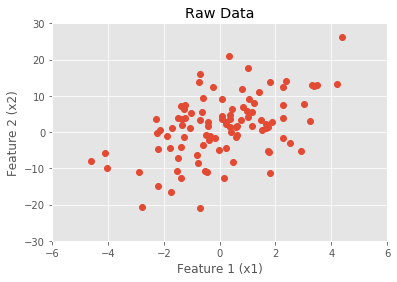

In [3]:
# I generate the data and plot it below.

import numpy as np, matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

np.random.seed(1) #make sure we're all working with the same numbers

X = np.random.normal(0.0,2.0,[100,1])
X = [X,X*2+np.random.normal(0.0,8.0,[100,1])]
X = np.squeeze(X)

plt.plot(X[0],X[1],'o')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Raw Data')
plt.axis([-6,6,-30,30]);

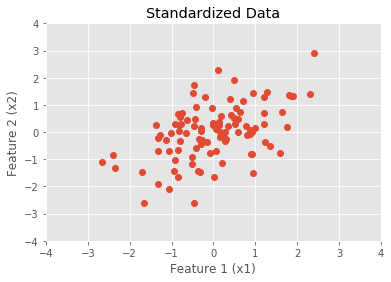

In [5]:
# Below I normalize and plot the data.

import scipy.stats as stats

X = stats.mstats.zscore(X,axis=1)

plt.plot(X[0],X[1],'o')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Standardized Data')
plt.axis([-4,4,-4,4]);

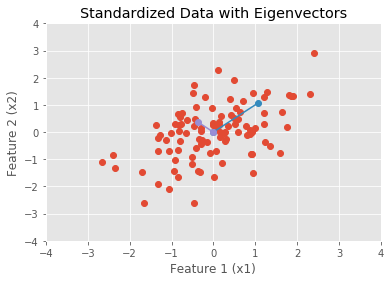

In [6]:
C = np.dot(X,np.transpose(X))/(np.shape(X)[1]-1);
[V,PC] = np.linalg.eig(C)

plt.plot(X[0],X[1],'o')
plt.plot([0,PC[0,0]*V[0]],[0,PC[1,0]*V[0]],'o-')
plt.plot([0,PC[0,1]*V[1]],[0,PC[1,1]*V[1]],'o-')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Standardized Data with Eigenvectors')
plt.axis([-4,4,-4,4]);

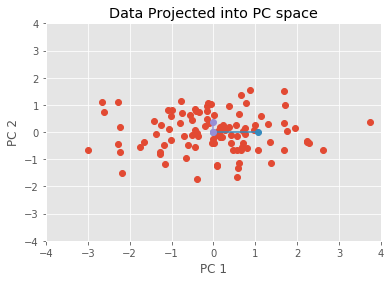

In [7]:
indices = np.argsort(-1*V)
V = V[indices]
PC = PC[indices,:]

X_rotated = np.dot(X.T,PC)

plt.plot(X_rotated.T[0],X_rotated.T[1],'o')
plt.plot([0,PC[1,0]*V[0]],[0,0],'o-')
plt.plot([0,0],[0,PC[1,1]*V[1]],'o-')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Data Projected into PC space')
plt.axis([-4,4,-4,4]);

### Eigendecomposition

Matrix decompositions are methods that reduce a matrix into constituent parts that make it easier to calculate more complex matrix operations. A common analogy for matrix decomposition is the factoring of numbers, such as the factoring of 10 into 2 × 5.

Perhaps the most used type of matrix decomposition is the eigendecomposition that decomposes a (square) matrix into eigenvectors and eigenvalues. This decomposition also plays a role in methods used in machine learning, such as in the Principal Component Analysis method or PCA.

A vector is an eigenvector of a matrix if it satisfies the following equation.
<center>$ A·v=λ·v ~ or ~ Av = λv$</center>

This is called the eigenvalue equation, where $A$ is the parent square matrix that we are decomposing, $\nu$ is the eigenvector of the matrix, and $λ$ is the lowercase Greek letter lambda and represents the eigenvalue scalar.

The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.

<center>$ A = Q · Λ · Q^T$</center>

Where $Q$ is a matrix comprised of the eigenvectors, $Λ$ is the uppercase Greek letter lambda and is the diagonal matrix comprised of the eigenvalues, and $Q^T$ is the transpose of the matrix comprised of the eigenvectors.

Eigenvectors are unit vectors, which means that their length or magnitude is equal to 1.0. They are often referred as right vectors, which simply means a column vector. Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude.

A matrix that has only positive eigenvalues is referred to as a positive definite matrix, whereas if the eigenvalues are all negative, it is referred to as a negative definite matrix.

In [2]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
  [1, 2, 3],
  [4, 5, 6],
   [7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)
print(values)
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [3]:
# reconstruct matrix
from numpy import diag
from numpy.linalg import inv
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)
# create matrix from eigenvectors
Q = vectors
# create inverse of eigenvectors matrix
R = inv(Q)
# create diagonal matrix from eigenvalues
L = diag(values)
# reconstruct the original matrix
B = Q.dot(L).dot(R)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


###  Principal Component Analysis

An important machine learning method for dimensionality reduction is called Principal Component Analysis. It is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

It can be thought of as a projection method where data with p-columns (features) is projected into a subspace with p or fewer columns, whilst retaining the essence of the original data.

The first step is to calculate the mean values of each column. Next, we need to center the values in each column by subtracting the mean column value. The next step is to calculate the covariance matrix of the centered matrix. Finally, we calculate the eigendecomposition of the covariance matrix. The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace. Ideally, we would select $k$ eigenvectors, called principal components, that have the $k$ largest eigenvalues.

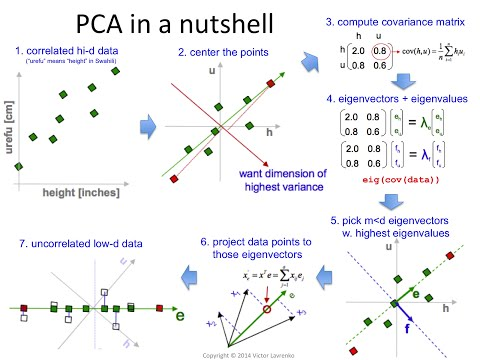

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('QP43Iy-QQWY')

In [5]:
# principal component analysis
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define matrix
A = array([
  [1, 2],
  [3, 4],
[5, 6]])
print(A)
# column means
M = mean(A.T, axis=1)
# center columns by subtracting column means 
C=A-M
# calculate covariance matrix of centered matrix 
V = cov(C.T)
# factorize covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


### Principal Component Analysis in [scikit-learn](http://scikit-learn.org)



In [6]:
# principal component analysis with scikit-learn
from numpy import array
from sklearn.decomposition import PCA
# define matrix
A = array([
  [1, 2],
  [3, 4],
  [5, 6]])
print(A)
# create the transform
pca = PCA(2)
# fit transform
pca.fit(A)
# access values and vectors
print(pca.components_)
print('exp_var', pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
exp_var [8. 0.]
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


### Singular Value Decomposition

Matrix decomposition, also known as matrix factorization, involves describing a given matrix using its constituent elements. Perhaps the most known and widely used matrix decomposition method is the Singular-Value Decomposition, or SVD. All matrices have an SVD, which makes it more stable than other methods, such as the eigendecomposition. As such, it is often used in a wide array of applications including compressing, denoising, and data reduction.

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

<center>$ A=U·Σ·V^T$</center>

Where $A$ is the real $n×m$ matrix that we wish to decompose, $U$ is an $m×m$ matrix, $Σ$ represented by the uppercase Greek letter sigma)is an $m×n$ diagonal matrix, and $V^T$ is the $V$ transpose of an $n × n$ matrix where $T$ is a superscript.

The diagonal values in the $Σ$ matrix are known as the singular values of the original matrix $A$. The columns of the $U$ matrix are called the left-singular vectors of $A$, and the columns of $V$ are called the right-singular vectors of $A$. The SVD is calculated via iterative numerical methods. We will not go into the details of these methods. Every rectangular matrix has a singular value decomposition, although the resulting matrices may contain complex numbers and the limitations of floating point arithmetic may cause some matrices to fail to decompose neatly.


- $U$ is the matrix of eigenvectors of $AA^T$
- $Σ$ contains the squareroot of the eigenvalues of $AA^T$
- $V$ is the matrix of eigenvectors of $AA^T$

In this representation the diagonal entries in $Σ$ are the singular values and they are normally ordered with the largest singular value (largest eigenvalue) first. Dimension reduction is achieved by dropping all but k of these singular values.

The SVD is used widely both in the calculation of other matrix operations, such as matrix inverse, but also as a data reduction method in machine learning. SVD can also be used in least squares linear regression, image compression, and denoising data.

#### Calculate Singular-Value Decomposition

The SVD can be calculated by calling the **svd()** function.

In [7]:
# singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([
  [1, 2],
  [3, 4],
  [5, 6]])
print(A)
# factorize
U, s, V = svd(A)
print(U)
print(s)
print(V)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [8]:
# reconstruct rectangular matrix from svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
  [1, 2],
  [3, 4],
  [5, 6]])
print(A)
# factorize
U, s, V = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(V))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


#### Dimensionality Reduction

A popular application of SVD is for dimensionality reduction. Data with a large number of features, such as more features (columns) than observations (rows) may be reduced to a smaller subset of features that are most relevant to the prediction problem. The result is a matrix with a lower rank that is said to approximate the original matrix. To do this we can perform an SVD operation on the original data and select the top $k$ largest singular values in $Σ$. These columns can be selected from $Σ$ and the rows selected from $V^T$ . An approximate $B$ of the original vector $A$ can then be reconstructed.

<center>$ B=U·Σ_k ·V_k^T$</center>


In [9]:
# data reduction with svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
  [1,2,3,4,5,6,7,8,9,10],
  [11,12,13,14,15,16,17,18,19,20],
  [21,22,23,24,25,26,27,28,29,30]])
print(A)
# factorize
U, s, V = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
V = V[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(V))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(V.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


In [10]:
# svd data reduction in scikit-learn
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define matrix
A = array([
  [1,2,3,4,5,6,7,8,9,10],
  [11,12,13,14,15,16,17,18,19,20],
  [21,22,23,24,25,26,27,28,29,30]])
print(A)
# create transform
svd = TruncatedSVD(n_components=2)
# fit transform
svd.fit(A)
# apply transform
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


### PCA vs Linear Regression

<img src="images/pcavslr.jpg"  width="600">

> PCA (Perpendicular/orthogonal distance - between x_1 and x_2),
OLS (Vertical distance - between x and y)

### Mathematics of Principal Components

- We start with p-dimensional feature vectors, and want to summarize them by projecting down into a q-dimensional subspace. 

- There are several equivalent ways of deriving the principal components mathematically. The simplest one is by finding the projections which maximize the variance. 

- The first principal component is the direction in feature space along which projections have the largest variance. The second principal component is the direction which maximizes variance among all directions orthogonal to the first. The kth component is the variance-maximizing direction orthogonal to the previous k − 1 components. There are p principal components in all.

- Rather than maximizing variance, it might sound more plausible to look for the projection with the smallest average (mean-squared) distance between the original vectors and their projections on to the principal components; this turns out to be equivalent to maximizing the variance.

- Throughout, assume that the data have been “centered”, so that every feature has mean 0. If we write the centered data in a matrix $X$, where rows are objects and columns are features, then $X^T X = nV$, where $V$ is the covariance matrix of the data.

https://www.stat.cmu.edu/~cshalizi/350/lectures/10/lecture-10.pdf

### Showcase: PCA Image Compression

In [6]:
# IMPORT NECESSARY LIBRARIES

import scipy
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

# IMPORTING IMAGE AND TAKING R,G,B COMPONENTS

a = plt.imread("images/hokie.jpg")
a_np = np.array(a)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def comp_2d(image_2d): # FUNCTION FOR RECONSTRUCTING 2D MATRIX USING PCA
    cov_mat = image_2d - np.mean(image_2d , axis = 1)
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) # USING "eigh", SO THAT PROPRTIES OF HERMITIAN MATRIX CAN BE USED
    p = np.size(eig_vec, axis =1)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    numpc = 100 # THIS IS NUMBER OF PRINCIPAL COMPONENTS, YOU CAN CHANGE IT AND SEE RESULTS
    if numpc <p or numpc >0:
        eig_vec = eig_vec[:, range(numpc)]
    score = np.dot(eig_vec.T, cov_mat)
    recon = np.dot(eig_vec, score) + np.mean(image_2d, axis = 1).T # SOME NORMALIZATION CAN BE USED TO MAKE IMAGE QUALITY BETTER
    recon_img_mat = np.uint8(np.absolute(recon)) # TO CONTROL COMPLEX EIGENVALUES
    return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = comp_2d(a_r), comp_2d(a_g), comp_2d(a_b) # RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
recon_color_img = Image.fromarray(recon_color_img)
recon_color_img.show()

For more details on Principal Component Analysis Application to images see: http://people.ciirc.cvut.cz/~hlavac/TeachPresEn/11ImageProc/15PCA.pdf

## Stock Market Analytics with PCA

In this section, we will see how PCA can be used in the stock market, how it relates to the Capital Asset Pricing Model (CAPM), and how we can use PCA to analyse the impact of COVID19. This is just one of the applications of PCA in finance. It can also be used for the portfolio cunstruction.

#### Quick Review of CAPM

* For more details, please see the notebook I have already posted on canvas for asset peicing models. 

The returns of a stock can be decomposed into: (1) the returns of the risk-free asset, (2) the returns of the market factor, and (3) the idiosyncratic returns of the stock. Overall, the market factor is the primary driver of all stock returns.

The Capital Asset Pricing Model (CAPM) is a famous framework for pricing the returns of an asset such as a stock, with many interesting connections to the modern portfolio theory, which I will discuss in a future notebook.

Before diving into the details of the CAPM, it is important to understand the notion of risk-free assets and the market factor. A risk-free asset is essentially an asset than can give you returns at virtually no risk (e.g. a government bond). The market factor instead monitors the state of the overall stock market as a whole and is often measured through an index such as the S&P500. Generally speaking, the overall market is more volatile/risky than government bonds, but it also provides more returns to the investors. 

With those definitions in mind, let’s look at the concept of the Security Market Line (SML) from CAPM. In practice, SML decomposes the returns of a stock $r_i$ into three main factors:

1. $r_f$: risk-free return
2. $\beta_i * (r_m-r_f)$: market factor return
3. $e_i$: idiosyncratic return


### $r_i = r_f + \beta_i * (r_m-r_f) + e_i $

The intuition behind this equation is that:

(1) the return of a stock should be at least equal to the return of the risk-free asset (otherwise why take the extra risk in the first place?)

(2) the return of the asset is also explained by the market factor, which is captured by the term (r_m-r_f) (measures the excess return of the market with respect to the risk-free asset) and beta_i (measures the degree to which the asset is affected by the market factor).

(3) the return of a stock is also affected by idiosyncratic factors, which are stock specific factors (e.g. the earnings release of a stock affects that individual stock only, but not the overall market).
Empirically speaking, the market factor is the primary driver of the stock market returns, as it tends to explain most of the returns of any given stock in any given day.

#### The Link Between PCA and CAPM
When applying PCA to daily stock returns, the first principal component approximates the market factor.
Let’s consider the 500 stocks in the S&P500 index, and compute their daily returns, as shown in the figures below.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests

In [5]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()

In [6]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close']

[*********************100%***********************]  503 of 503 completed


In [7]:
# log returns
rs = prices.apply(np.log).diff(1)

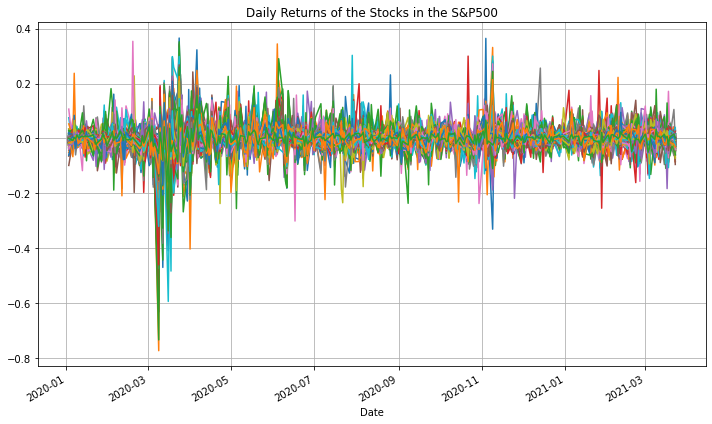

In [8]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

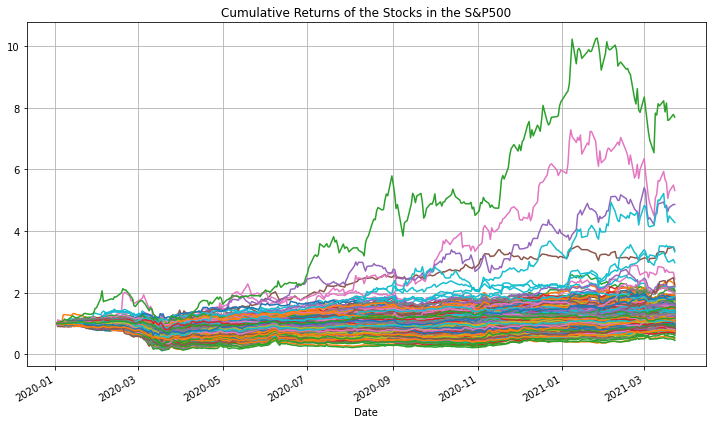

In [9]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

The figures above show the daily returns and the cumulative returns of the 500 stocks in the S&P500 since the beginning of 2020. The amount of raw data can look quite overwhelming, so let’s process them via PCA by computing the 1st principal component of the daily returns. The figure below shows the values of the 1st principal component, which is essentially a vector of dimension 500 that contains a value for each of the 500 stocks.

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(1).fit(rs.fillna(0))

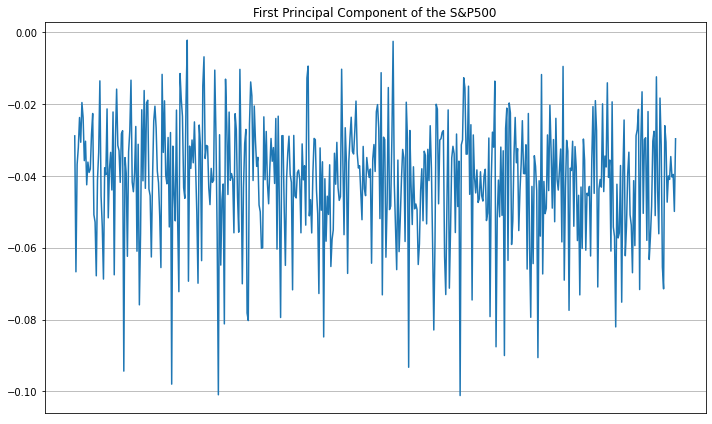

In [12]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()

Recall that (1) the first principal component represents the linear combination of the input data that explains most of the variance, and (2) the primary driver of stock returns is the overall market factor. This implies that if we formulate a portfolio of stocks by allocating the cash proportionally to the 1st principal component (i.e. linear combination of the input data), we can replicate the returns of the S&P500 approximately (i.e. the primary driver of stock returns).

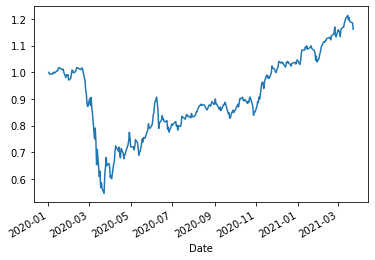

In [13]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [15]:
"""
The SPDR S&P 500 trust (SPY) is an exchange-traded fund which trades on the NYSE Arca under the symbol. 
SPDR is an acronym for the Standard & Poor's Depositary Receipts, the former name of the ETF. 
It is designed to track the S&P 500 stock market index. This fund is the largest ETF in the world.
"""
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


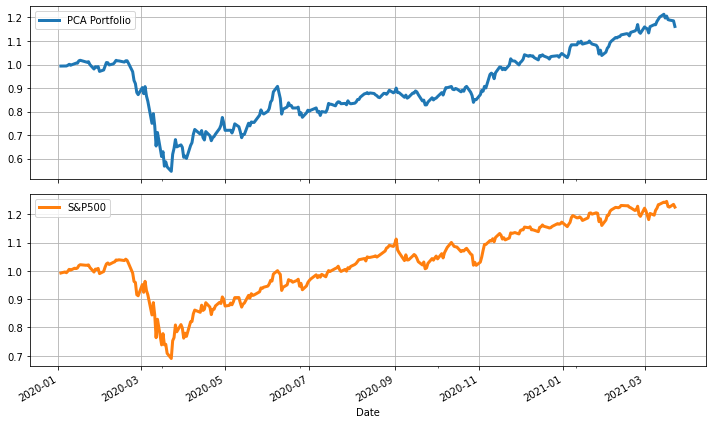

In [16]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()

As shown in the figure above, our PCA portfolio can work as a proxy for the market factor, which is the primary driver of stock returns (hence explaining most of the variance!). Note that although they are similar, the PCA portfolio doesn’t replicate the S&P500 exactly, since the S&P500 is a market-capitalisation weighted average of the 500 stocks, while the weights in the PCA portfolio is influenced by the explained variance.

## Analysing the Impact of COVID19 with PCA (from: https://www.yaoleixu.com)

Using PCA, we can cluster together businesses that were most/least affected by the COVID19 pandemic, without any prior knowledge of their fundamentals.

As you probably know, 2020 has been a wild ride for the stock market due to the COVID19 pandemic. Using PCA, we can analyse how this pandemic affected the individual stocks.

For instance, let’s look a the 1st principal component, and select the stocks that have the most and the least negative PCA weights, as shown below.

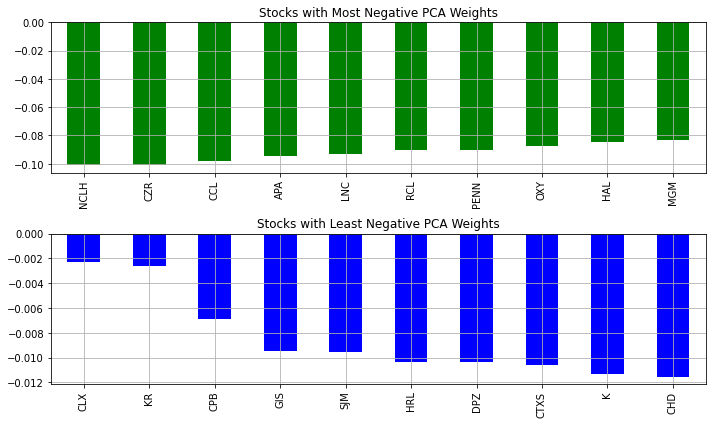

In [17]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()

Notice from the figure above how the most negative stocks are in the tourism and the energy sector. This makes sense since COVID19 heavily impacted the travelling business, as well as the energy companies that provide fuel for those businesses. On the other hand, the least impacted companies fall into the consumer goods sectors, which also makes sense since this sector benefited from the boost in sales of consumer goods due to the quarantine measures. 

In addition, we can formulate a winning portfolio that is long the top 10 companies according to the PCA weights. As shown in the figure below, the resulting portfolio would have performed significantly better than the market, since it invested in companies that actually benefited from the pandemic (this would have been great if one could go back in time and implement this strategy, as it has look-ahead bias).

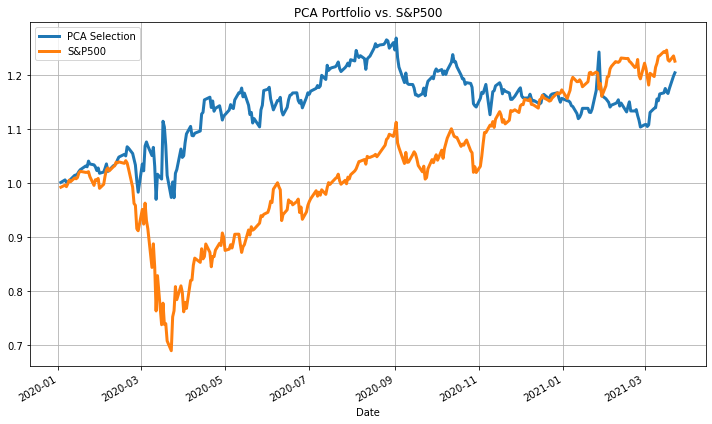

In [18]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()

**PCA Pros**:

* Reduces dimensionality
* Interpretable
* Fast run time

**PCA Cons**:
* Incapable of learning non-linear feature representations

**Autoencoder Pros**:

* Able to learn non-linear feature representations
* Reduce dimensionality

**Autoencoder Cons**:

* Computationally expensive to train
* Extremely uninterpretable
* The underlying math is more complicated
* Prone to overfitting, though this can be mitigated via regularization

### Autoencoders with Keras (The Python Deep Learning library)

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Read the documentation at [Keras.io](https://keras.io).

#### What’s Required

- Encoding function
- Decoding function
- Loss function describing the amount of information loss between the compressed and decompressed representations of the data examples and the decompressed representation (i.e. a “loss” function).

The encoding/decoding functions are typically neural nets and are differentiable. The differentiable part enables optimizing the parameters of the encoding/decoding functions to minimize the reconstruction loss.


> In fact, if the encoder/decoder functions are linear, the result spans the space of the PCA solution. The nonlinear part is useful because they can capture, for example, multimodality (~ non normality) in the feature space, which PCA can’t.

#### Let's build the simplest possible autoencoder

from: https://blog.keras.io/building-autoencoders-in-keras.html


In [25]:
# Importing the required libraries

#from keras.datasets import mnist
#from keras.layers import Input, Dense
#from keras.models import Model

## try this if you received an error

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Loading the MNIST dataset images and not their labels. We want to reconstruct the images as output of the autoencoder and hence we do not need labels.

https://en.wikipedia.org/wiki/MNIST_database

In [26]:
# Creating a training set and test set and normalizing the data for better training.

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Our input image has a dimension of 784, we will encode it to 32 (Dimensionality reduction) and the decode it back to the original dimension of 784.

We need to take the input image of dimension 784 and convert it to keras tensors (3D Matrix).

In [27]:
input_img= Input(shape=(784,))

In [28]:
encoded = Dense(units=32, activation='relu')(input_img)

In [29]:
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [31]:
# this model maps an input to its reconstruction
autoencoder=Model(input_img, decoded)

In [32]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [33]:
# To get the extracted nonlinear common factor from encoder:

encoder = Model(input_img, encoded)

We now compile the autoencoder model with **Adam** optimizer. As pixels have a value of 0 0r 1 we use **binary_crossentropy** as the loss function and the metrics uses for the performance of the model is accuracy

In [34]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We now train the autoencoder using the training data with 50 epochs and batch size of 256. We also shuffle the training data

In [35]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2811 - accuracy: 0.7812 - val_loss: 0.1922 - val_accuracy: 0.7986
Epoch 2/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1726 - accuracy: 0.8023 - val_loss: 0.1551 - val_accuracy: 0.8044
Epoch 3/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1458 - accuracy: 0.8069 - val_loss: 0.1350 - val_accuracy: 0.8079
Epoch 4/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1297 - accuracy: 0.8096 - val_loss: 0.1225 - val_accuracy: 0.8095
Epoch 5/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1195 - accuracy: 0.8111 - val_loss: 0.1142 - val_accuracy: 0.8110
Epoch 6/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1120 - accuracy: 0.8121 - va

Predicting the test set. We want to view the encoded images as well as the reconstructed images so we fit the test data on both autoencoder as well as encoder

In [36]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

Let’s plot the original input, encoded images (compressed representation) and the reconstructed images using matplotlib

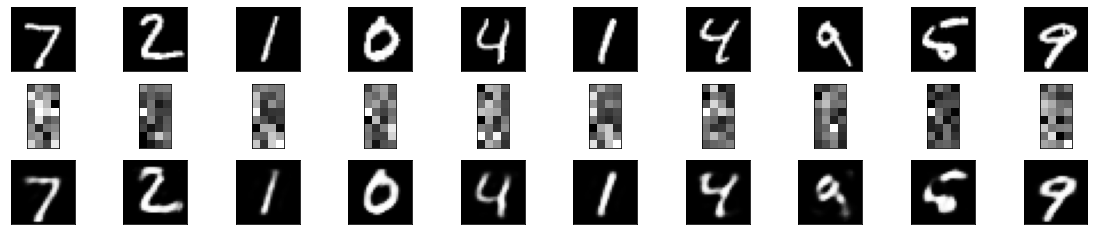

In [37]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()